# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

 # Check and remove missing data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
%matplotlib inline

ds = 'Yelp_Portfolio1_Input.csv'

In [2]:
dataSet = pd.read_csv(ds)
missingValsC = dataSet.isnull().sum()
columnsWithMissVal = []
for column in missingValsC.index:
    if missingValsC[column] > 0:
        columnsWithMissVal.append(column)   
for column in columnsWithMissVal:
    print(f"column name: {column}: {missingValsC[column]} missing values")
print(f"Length of data before removing missing values: {len(dataSet)}")


column name: business_categories: 777 missing values
column name: text: 6 missing values
Length of data before removing missing values: 229907


### Remove any row that contains at least one missing value

In [3]:
# cleanData = dataSet.dropna(inplace=False)
# print("Length of data after removing missing values:", len(cleanData))
# cleanData = cleanData[(cleanData['business_id'] != '#NAME?') & (cleanData['business_id'] != '#VALUE!')]
# cleanData = cleanData[(cleanData['user_id'] != '#NAME?') & (cleanData['user_id'] != '#VALUE!')]
# print("Length of data after removing invalid values:", len(cleanData))
# cleanData
##############
# cleanData = dataSet.dropna(inplace=False)
# print("Length of data after removing missing values:", len(cleanData))
# invalidValues = ['#NAME?', '#VALUE!']
# cleanData = cleanData[~cleanData['business_id'].isin(invalidValues)]
# cleanData = cleanData[~cleanData['user_id'].isin(invalidValues)]
# print("Length of data after removing invalid values:", len(cleanData))
# cleanData



In [4]:
cleanData = dataSet.dropna(inplace=False)
print("Length of data after removing missing values:", len(cleanData))
cleanData = cleanData.drop(cleanData.index[(cleanData['business_id'] == '#NAME?') |(cleanData['business_id'] == '#VALUE!') | (cleanData['user_id'] == '#VALUE!') | (cleanData['user_id'] == '#NAME?')])
print("Length of data after removing invalid values:", len(cleanData))
cleanData


Length of data after removing missing values: 229124
Length of data after removing invalid values: 222759


,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,26/1/2011,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,27/7/2011,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,27/5/2010,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,5/1/2012,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...
229901,Event Planning & Services; Venues & Event Spaces,Phoenix,C1tH3sEQra33EOTk56Eu1Q,11/9/2008,3,I'm sorry to this but I must admit I was prett...,2,q9XgOylNsSbqZqF_SO3-OQ
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ
229903,Hotels & Travel; Event Planning & Services; Ho...,Peoria,l5oUrgQ190l8CcN8uzd_pA,23/1/2011,1,My husband I stayed here for two nights. Of c...,2,dDNfSFT0VApxPmURclX6_g
229905,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,YQvg0JCGRFUkb6reMMf3Iw,18/1/2011,3,I have to take a star off for the spotty servi...,2,jopndPrv-H5KW2CfScnw9A


# Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.

Note: Use the $random.sample()$ function to select 10 random cities from the list of unique cities. Set the random seed to 42 before selecting the cities!!!

In [5]:
import random
random.seed(42)
cities = random.sample(list(cleanData['business_city'].unique()), 10)
sampleData = cleanData[cleanData["business_city"].isin(cities)]
print(f"Length of sample data: {len(sampleData)}")
sampleData

Length of sample data: 38654


,business_categories,business_city,business_id,date,stars,text,useful,user_id
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
13,Tattoo; Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
32,Tires; Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
50,Sushi Bars; Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
53,Arts & Entertainment; Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g
...,...,...,...,...,...,...,...,...
229884,Burgers; Restaurants,Glendale,sbnCG3-CouwIu0jsApfCsQ,26/2/2010,1,We ate at the Arrowhead Mall Johnny Rockets to...,0,mlY2rj2PBhK6-nlWjDMQIg
229889,Delis; Sandwiches; Restaurants,Tempe,cE99Cjrj2YXSGs4MECb86w,19/10/2007,3,You want a monster sandwich that will challeng...,6,tlSSQwfHYJany7wPoTH46A
229893,American (Traditional); Restaurants,Tempe,c8XlQvVNwKhH9BOHEObtNQ,16/12/2011,4,"Went for lunch at Claim Jumper, let me tell yo...",0,8dbRf1UsWp2ktXHZ6Zv06w
229902,Gastropubs; Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ


#  Descriptive statistics on the data output from Q2
###  Compute summary statistics for the `stars` column of the sample data
Note: the resulting output includes the count, mean, standard deviation, minimum, maximum values of the column.

In [6]:
print('summary statistics for the stars column of the sample data')
s = sampleData[['stars']]
s.describe()

summary statistics for the stars column of the sample data


,stars
count,38654.000000
mean,3.707922
std,1.240872
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


### Q3.2 For each city in the dataframe, how many unique businesses are there?

Note: the resulting dataframe has two columns: `business_city` and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [7]:
uBusinesses = sampleData.groupby('business_city')['business_id'].nunique().reset_index()
uBusinesses.columns = ['business_city', 'count']
res = uBusinesses[['business_city', 'count']]
countStats = uBusinesses[['count']]




In [8]:
res

,business_city,count
0,Ahwatukee,3
1,Cave Creek,62
2,Glendale,580
3,Goodyear,120
4,Grand Junction,1
5,Saguaro Lake,1
6,Sun City,27
7,Surprise,151
8,Tempe,1119
9,Tolleson,22


In [9]:
print("Summary statistics for count column")
countStats.describe()


Summary statistics for count column


,count
count,10.000000
mean,208.600000
std,364.492097
min,1.000000
25%,7.750000
50%,44.500000
75%,143.250000
max,1119.000000


### For each business category and business ID combination in the dataframe, how many unique users have rated the business?

Note: the resulting dataframe has three columns: `business_categories`, `business_id`, and `count`. I compute summary statistics for the `count` column.

In [10]:
uniqeuUsers = sampleData.groupby(['business_categories', 'business_id'])['user_id'].nunique().reset_index()
uniqeuUsers.columns = ['business_categories', 'business_id', 'count']
uniqeuUsers

,business_categories,business_id,count
0,Accessories; Fashion; Shopping; Cosmetics & Be...,F-HBLqU3Kvs89lkQ5CjLBQ,4
1,Active Life,HwjPC5yhvM2blTpmvlhZ2A,4
2,Active Life,RFAcGpV3m63LbUG-pi0Evg,11
3,Active Life,i2jU_fUdN5xnwXwoOtRDoA,11
4,Active Life,kJEPUMn279P_GzFMCr5l0g,5
...,...,...,...
2081,Women's Clothing; Men's Clothing; Fashion; Sho...,wdV0pJ4xNi60bME_pXK2dA,5
2082,Women's Clothing; Thrift Stores; Shopping; Fas...,kBboKZCqHsXOO8ooLeMJYA,5
2083,"Women's Clothing; Used, Vintage & Consignment;...",toaTvg00twp1w95tDuhU3Q,3
2084,"Women's Clothing; Used, Vintage & Consignment;...",wNm84v3I4ZONS9H8Vs-wkQ,8


In [11]:
countStatsUsers = uniqeuUsers[['count']]
countStatsUsers.describe()

,count
count,2086.000000
mean,18.529722
std,38.016503
min,2.000000
25%,4.000000
50%,6.000000
75%,16.000000
max,718.000000


# Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Q1 and the sampled dataset from Q2. For instance, does some cities tend to provide higher stars than others? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___).
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the Yelp data.

Analysis and observation are open, and require you to think critically and analyze data to develop your own insights and conclusions. It's important for you to analyze the data, identify patterns, draw your own conclusions, and communicate your findings. This fosters critical thinking skills, ownership of learning, and a deeper understanding of the data.

the method .corr() can be only used on numeric data which is "useful" for finding the relation between stars and the rest of the variables should be found on the graphs and plots

In [12]:
sampleData[['useful','stars']].corr()

,useful,stars
useful,1.000000,-0.063901
stars,-0.063901,1.000000


In [13]:
sampleData[['useful','stars']].cov()

,useful,stars
useful,3.555831,-0.149522
stars,-0.149522,1.539762


In [14]:
cleanData[['useful','stars']].corr()

,useful,stars
useful,1.000000,-0.033372
stars,-0.033372,1.000000


In [15]:
cleanData[['useful','stars']].cov()

,useful,stars
useful,4.978704,-0.090523
stars,-0.090523,1.477928


according to the correlation tables we got there is no correlation between stars and useful

correlation between city and the stars of sample data


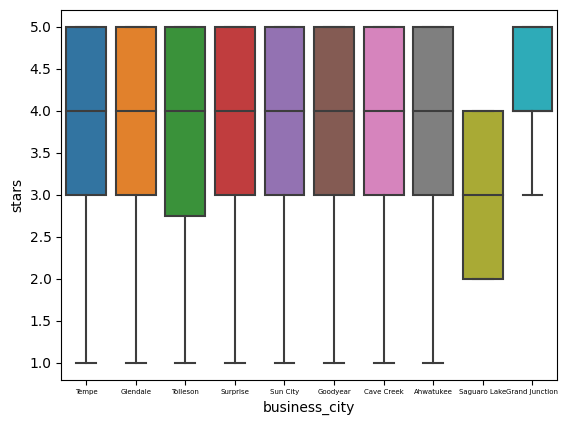

this plot somehow indicates that there is no mentionable direct relation between business cities and stars that have been given to businesses and it can be said that stars are being evenly distributed


In [16]:
print("correlation between city and the stars of sample data")
import seaborn as sns
sns.boxplot(data=sampleData, x="business_city", y="stars")
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)
plt.show()
print("this plot somehow indicates that there is no mentionable direct relation between business cities and stars that have been given to businesses and it can be said that stars are being evenly distributed")

correlation between city and the stars of clean data


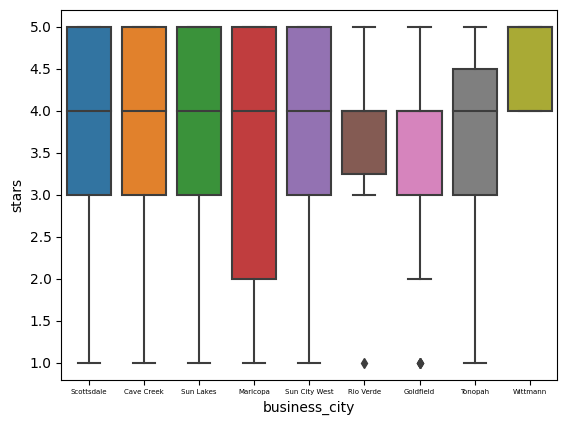

this plot almost indicates that there is no mentionable direct relation between business cities and stars that have been given to businesses and it can be said that stars are being evenly distributed


In [39]:
print("correlation between city and the stars of clean data")
cities = cleanData['business_city'].unique()
selectedCities = pd.Series(cities).sample(n=9).values
filteredCities = cleanData[cleanData['business_city'].isin(selectedCities)]
sns.boxplot(data=filteredCities, x="business_city", y="stars")
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)
plt.show()
print("this plot almost indicates that there is no mentionable direct relation between business cities and stars that have been given to businesses and it can be said that stars are being evenly distributed")

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 5.5, '5.5')])

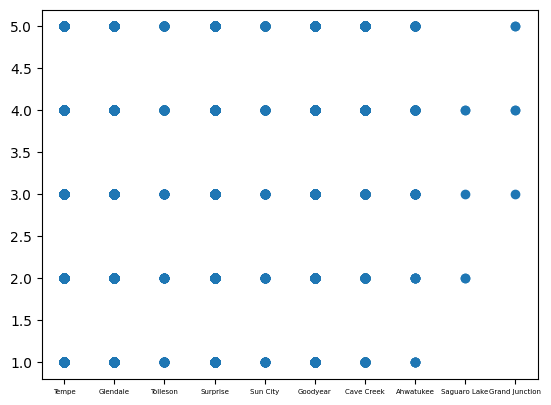

In [40]:
plt.scatter(data=sampleData,x='business_city',y='stars')
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 5.5, '5.5')])

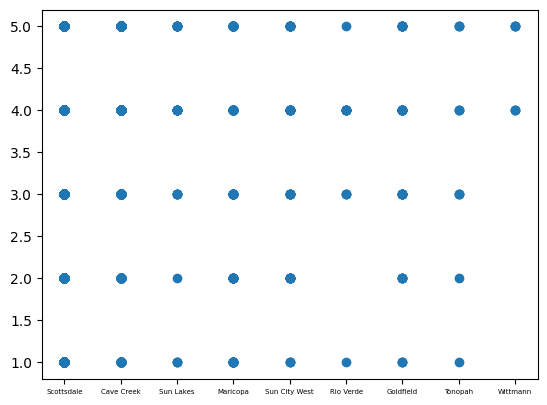

In [41]:
plt.scatter(data=filteredCities,x='business_city',y='stars')
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)

it can be said that the city of the businesses are not taking a part in different ratings and its completely random (it's upto the customer at the end to rate the business based on their experience not the city of the business, but it can be still some small relations between the city and ratings if we dive deeper in the data for example some cities may have people with high standards and it might affect the rating).

correlation between categories and the stars of sample data


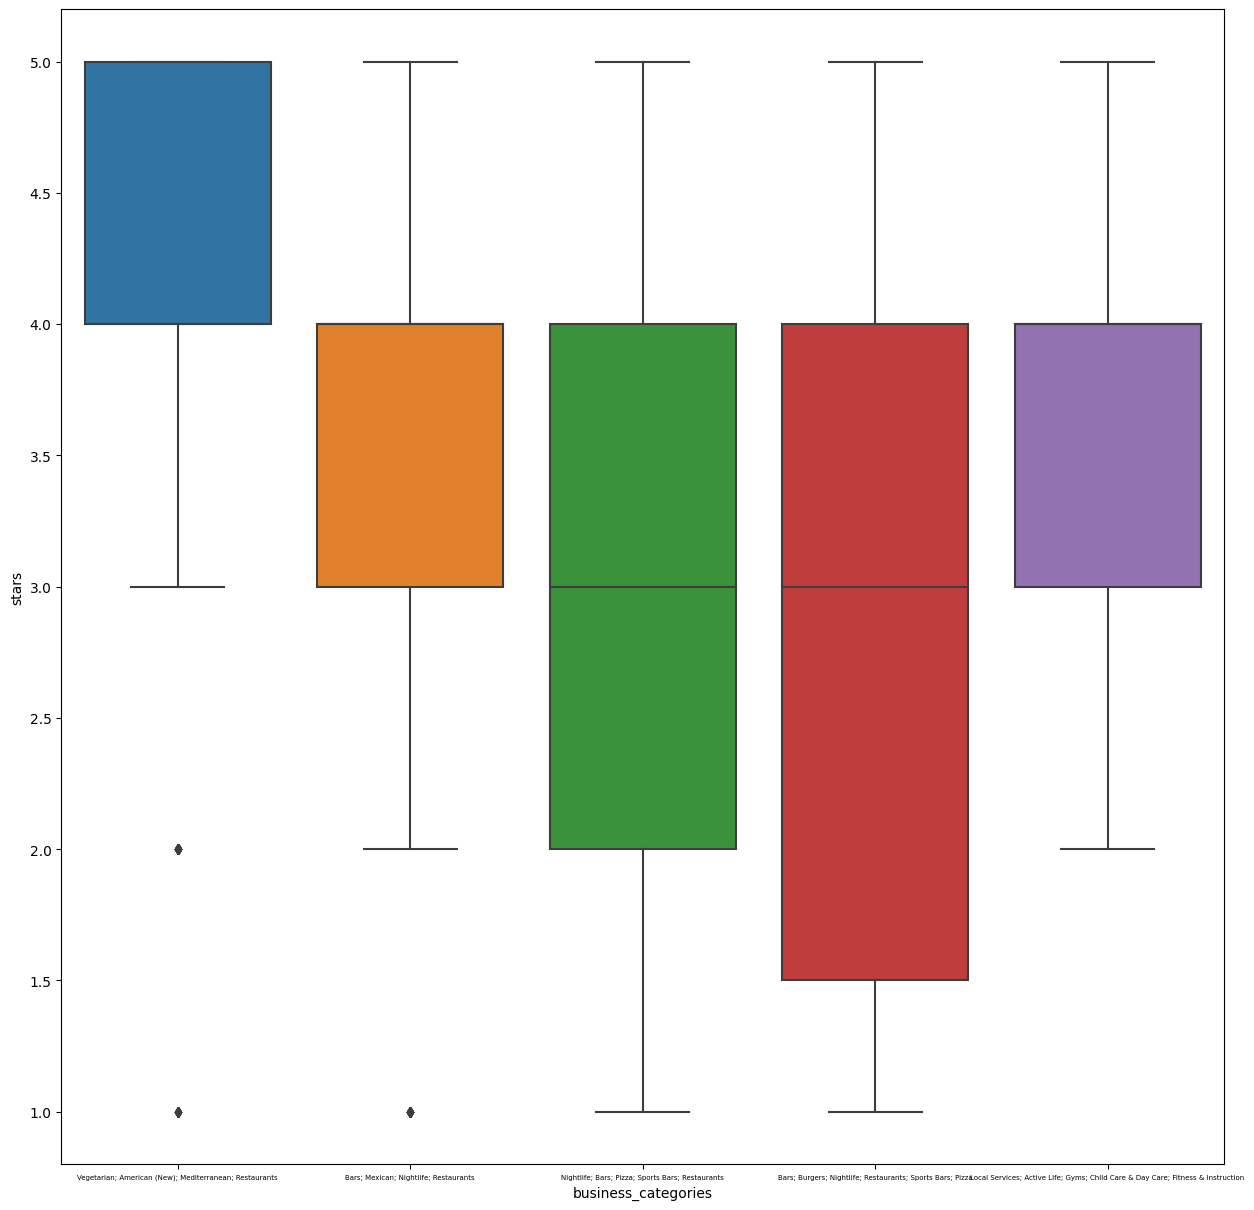

this can be said that this plot indicates that there is a relation between the business categories and stars that have been given to them


In [42]:
print("correlation between categories and the stars of sample data")
categories = sampleData['business_categories'].unique()
selectedCategories = pd.Series(categories).sample(n=5).values
filteredCategories = sampleData[sampleData['business_categories'].isin(selectedCategories)]
plt.figure(figsize=(15,15))
sns.boxplot(data=filteredCategories, x="business_categories", y="stars")
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)
plt.show()
print('this can be said that this plot indicates that there is a relation between the business categories and stars that have been given to them')

correlation between categories and the stars of clean data


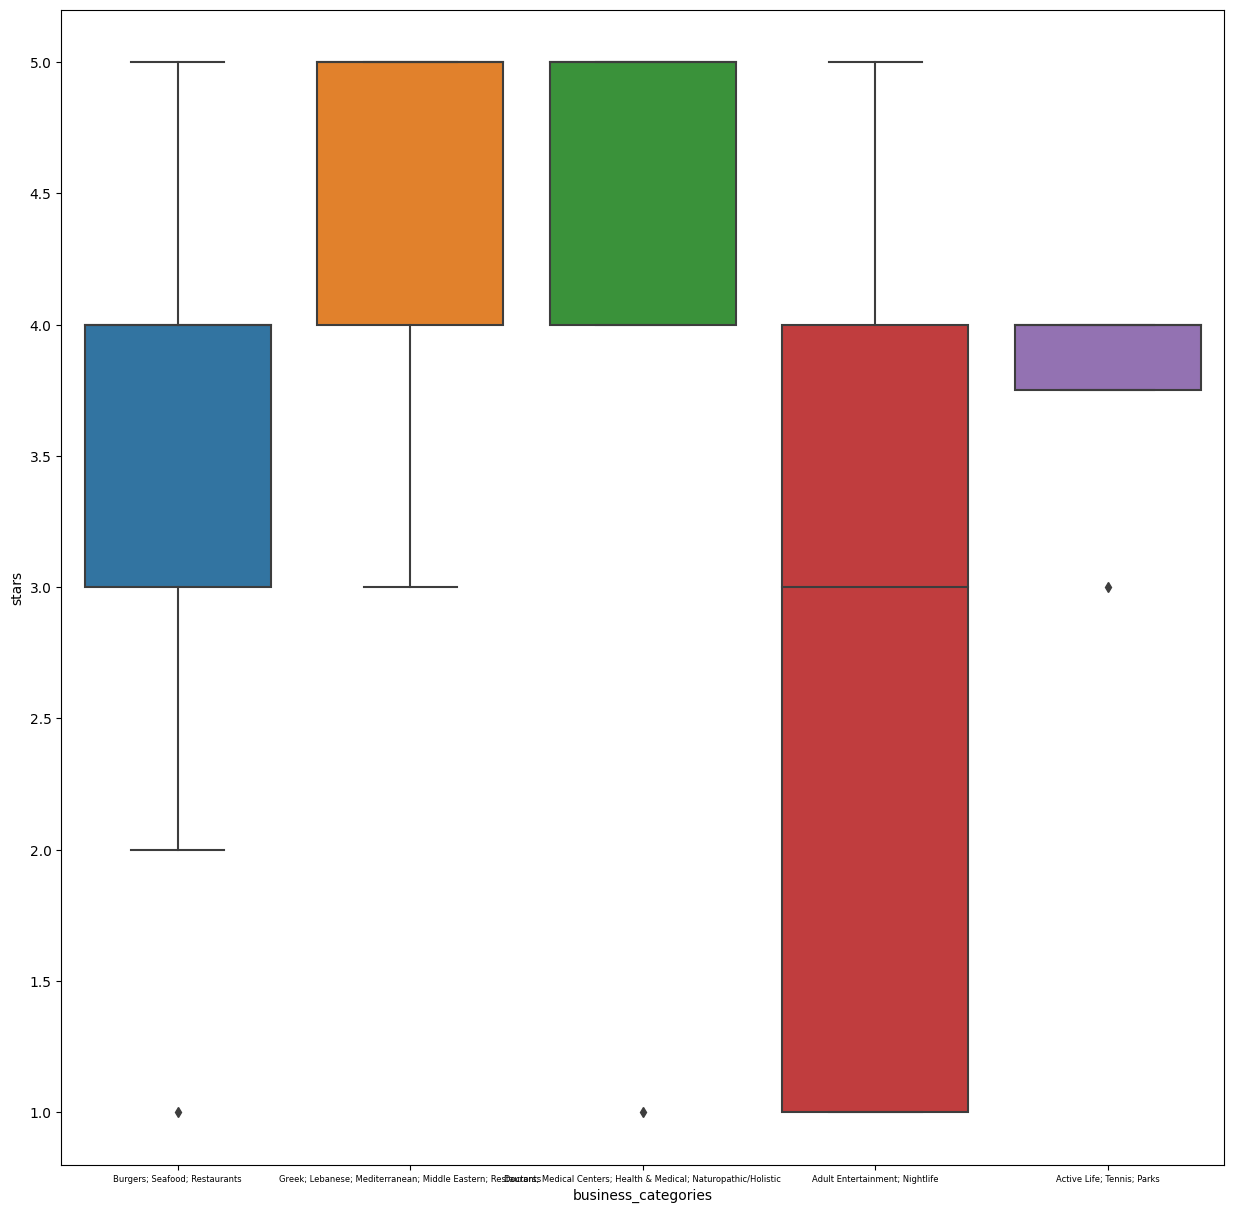

this can be said that this plot indicates that there is a relation between the business categories and stars that have been given to them


In [19]:
print("correlation between categories and the stars of clean data")
categories = cleanData['business_categories'].unique()
selectedCategories = pd.Series(categories).sample(n=5).values
filteredCategories = cleanData[cleanData['business_categories'].isin(selectedCategories)]
plt.figure(figsize=(15,15))
sns.boxplot(data=filteredCategories, x="business_categories", y="stars")
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)
plt.show()
print('this can be said that this plot indicates that there is a relation between the business categories and stars that have been given to them')

in these plots where i was looking for a meaningful relationship and correlation between business categories and stars where it can be seen that there is the most flunctuation and difference in stars based on their categories. based on the categories i could see that the ones that are food or beverage related have more stretched boxplots which means there are more variety of ratings (people have different point of views and opinions) but more likely to get high stars. for categories that are service related there is still a stretched boxplot but the stars are going lower than food related businesses and are more in between 3 & 4 stars. for businesses that sell goods or products and are in shopping categories the box is shorter and it shows that there is less different in reviews and point of views.

correlation between useful and the stars of sample data


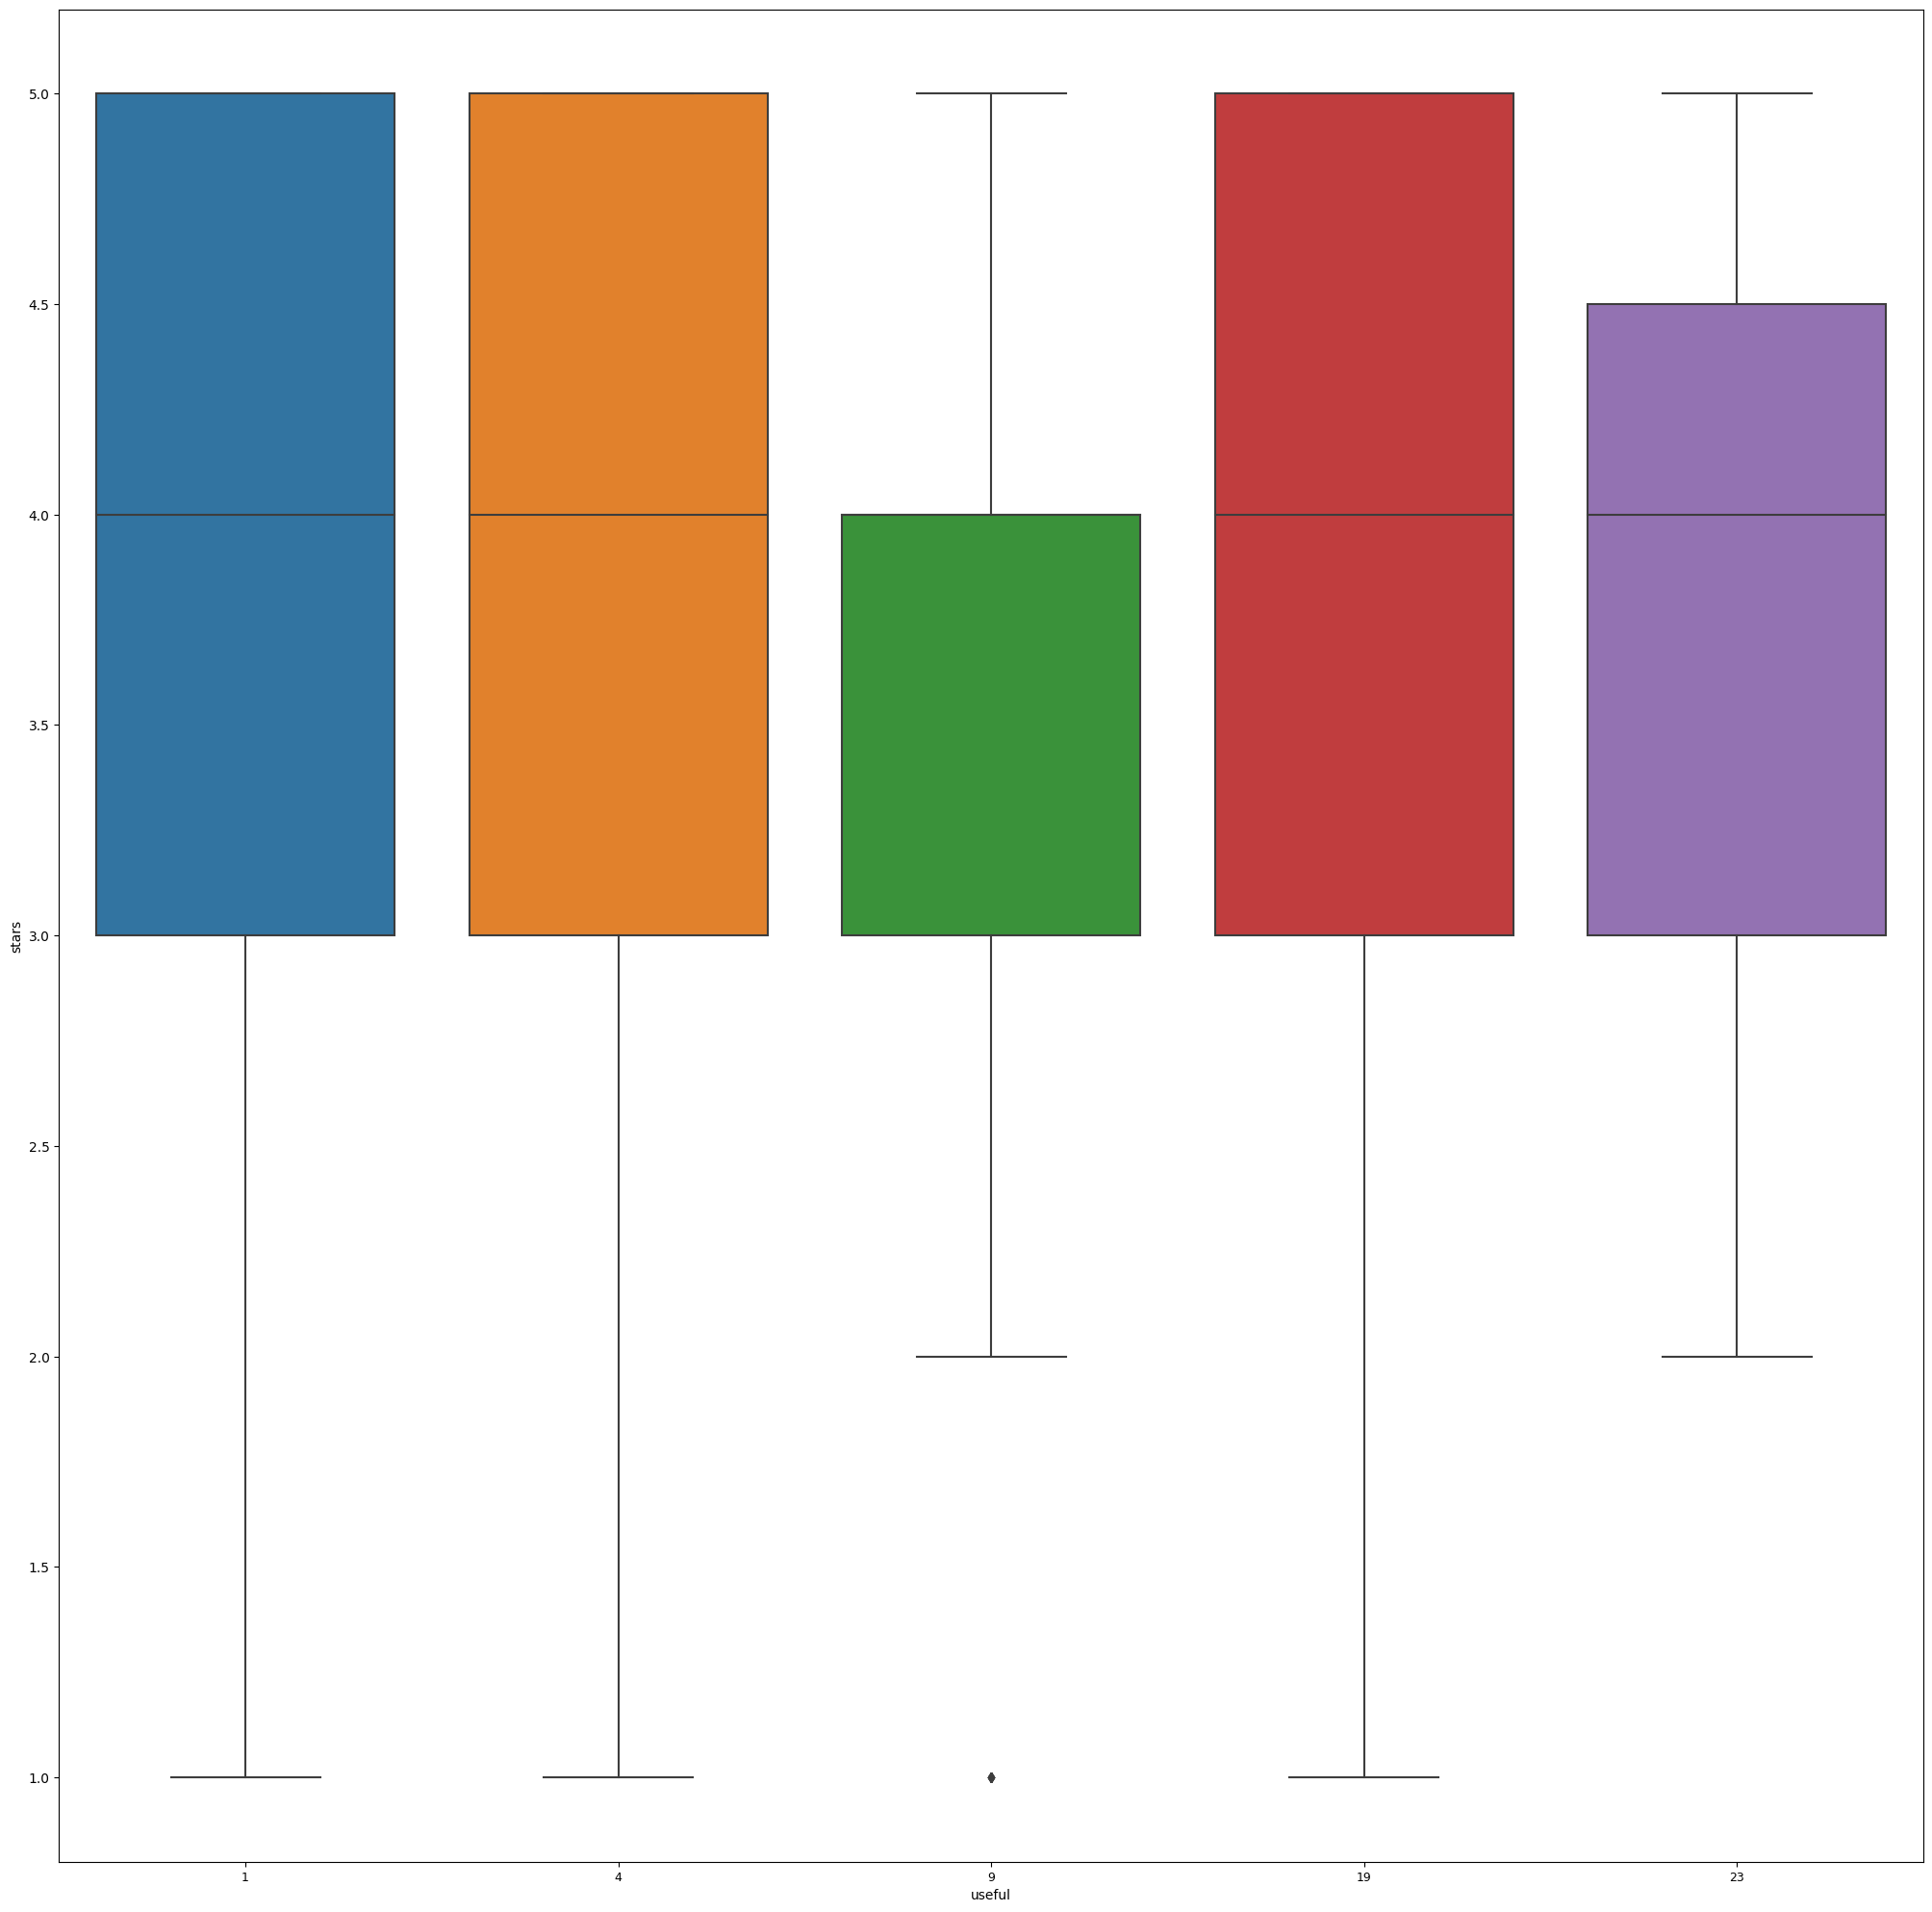

in this plot the idea of the correlation between the stars and useful ratings has been tested and as it can be seen there is no relation between useful ratings and the stars and its being randomly and almost evenly distributed


In [20]:
print("correlation between useful and the stars of sample data")
usefuls = sampleData['useful'].unique()
selectedUses = pd.Series(usefuls).sample(n=5)
filteredUses = sampleData[sampleData['useful'].isin(selectedUses)]
plt.figure(figsize=(25,25))
sns.boxplot(data=filteredUses, x="useful", y="stars")
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.show()
print('in this plot the idea of the correlation between the stars and useful ratings has been tested and as it can be seen there is no relation between useful ratings and the stars and its being randomly and almost evenly distributed')

correlation between useful and the stars of clean data


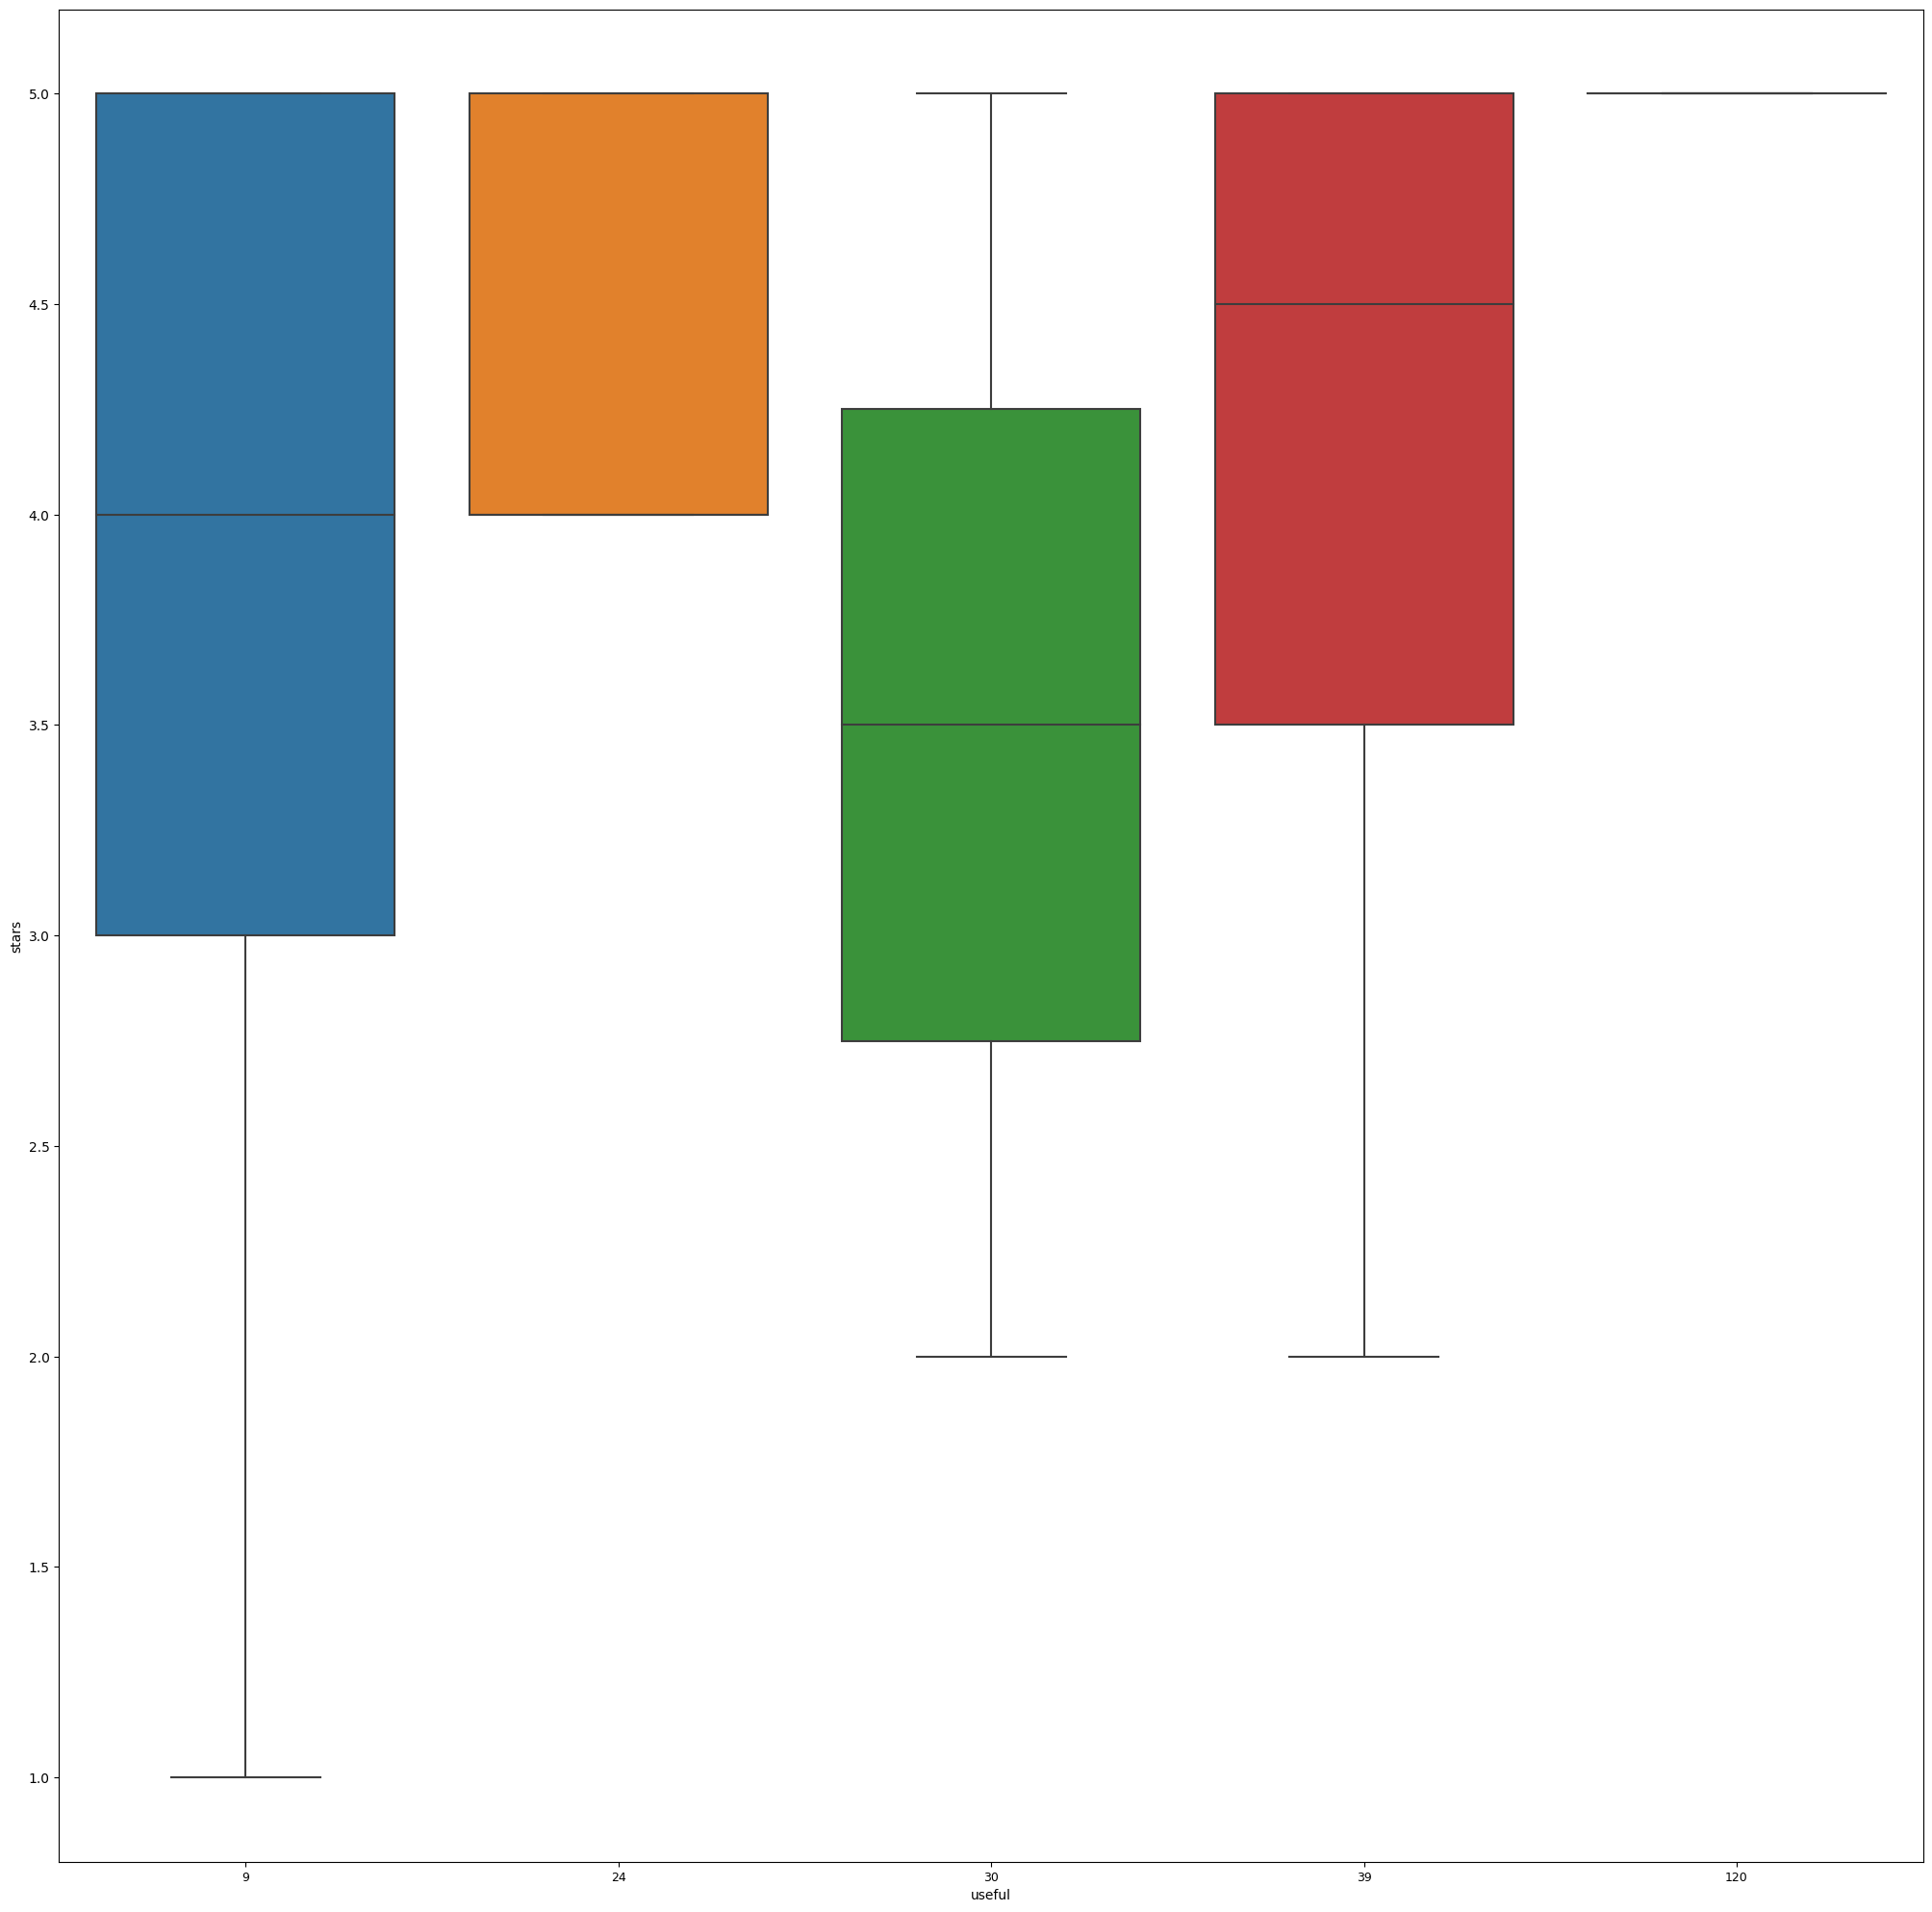

in this plot the idea of the correlation between the stars and useful ratings has been tested and as it can be seen there is no relation between useful ratings and the stars and its being randomly and almost evenly distributed


In [21]:
print("correlation between useful and the stars of clean data")
usefuls = cleanData['useful'].unique()
selectedUses = pd.Series(usefuls).sample(n=5)
filteredUses = cleanData[cleanData['useful'].isin(selectedUses)]
plt.figure(figsize=(25,25))
sns.boxplot(data=filteredUses, x="useful", y="stars")
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.show()
print('in this plot the idea of the correlation between the stars and useful ratings has been tested and as it can be seen there is no relation between useful ratings and the stars and its being randomly and almost evenly distributed')

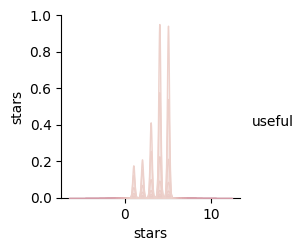

In [22]:
sns.pairplot(data=cleanData, hue='useful')

this figure can be demonstrating that there is no correlation between useful and the stars


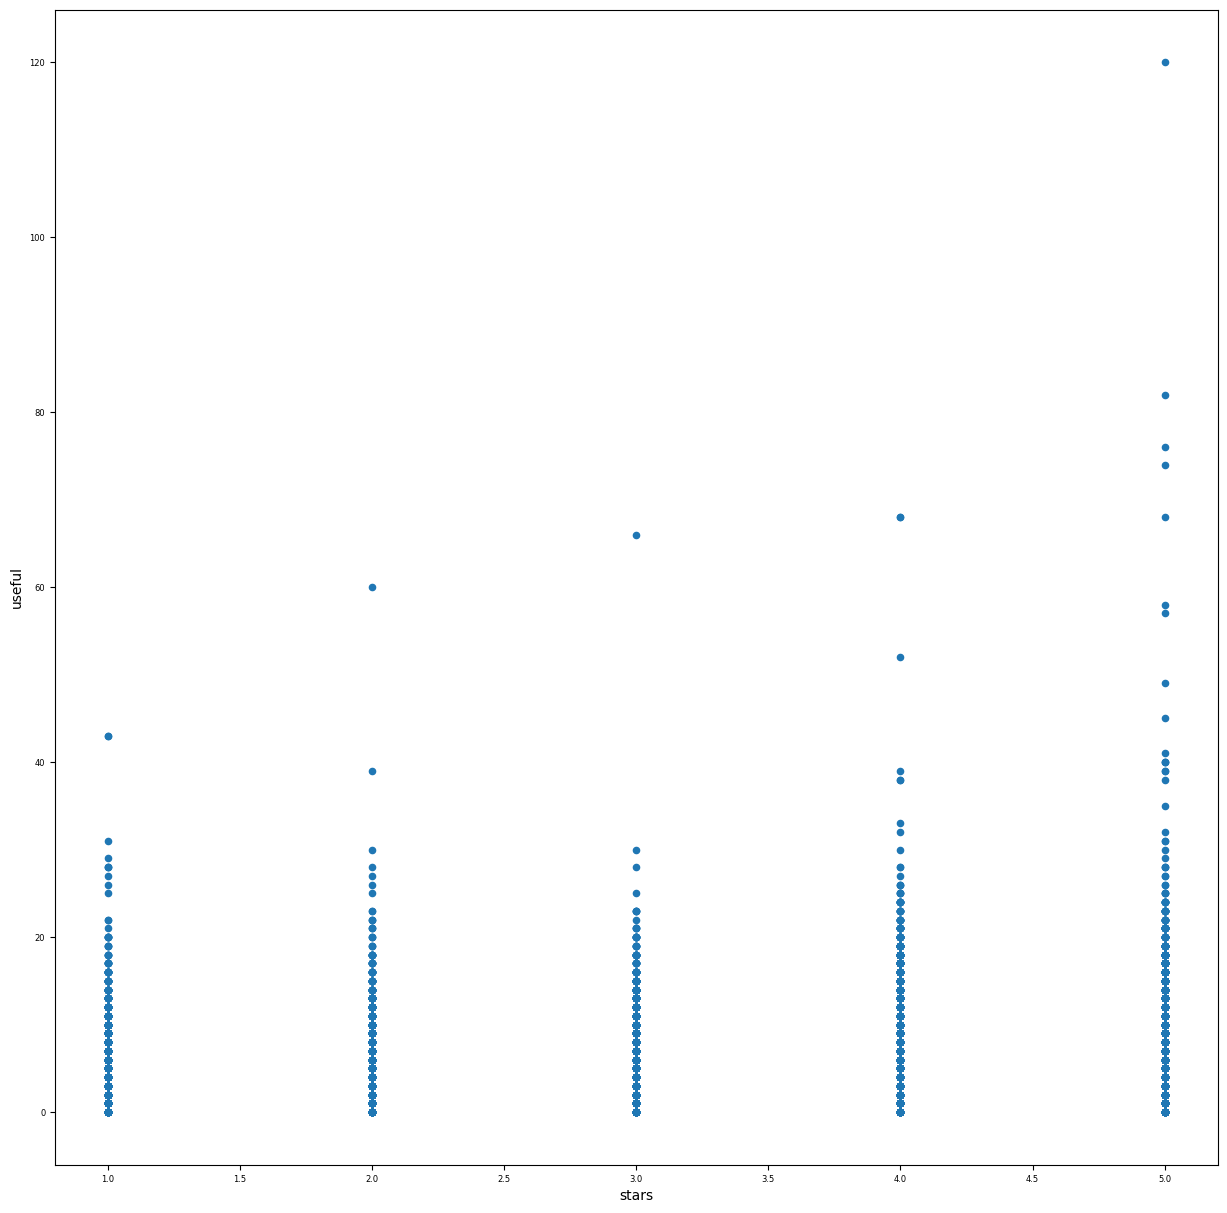

In [23]:
cleanData.plot(kind = 'scatter',y = 'useful',x='stars',fontsize=6,figsize=(15,15))
print("this figure can be demonstrating that there is no correlation between useful and the stars")

this figure can be demonstrating that there is no correlation between useful and the stars


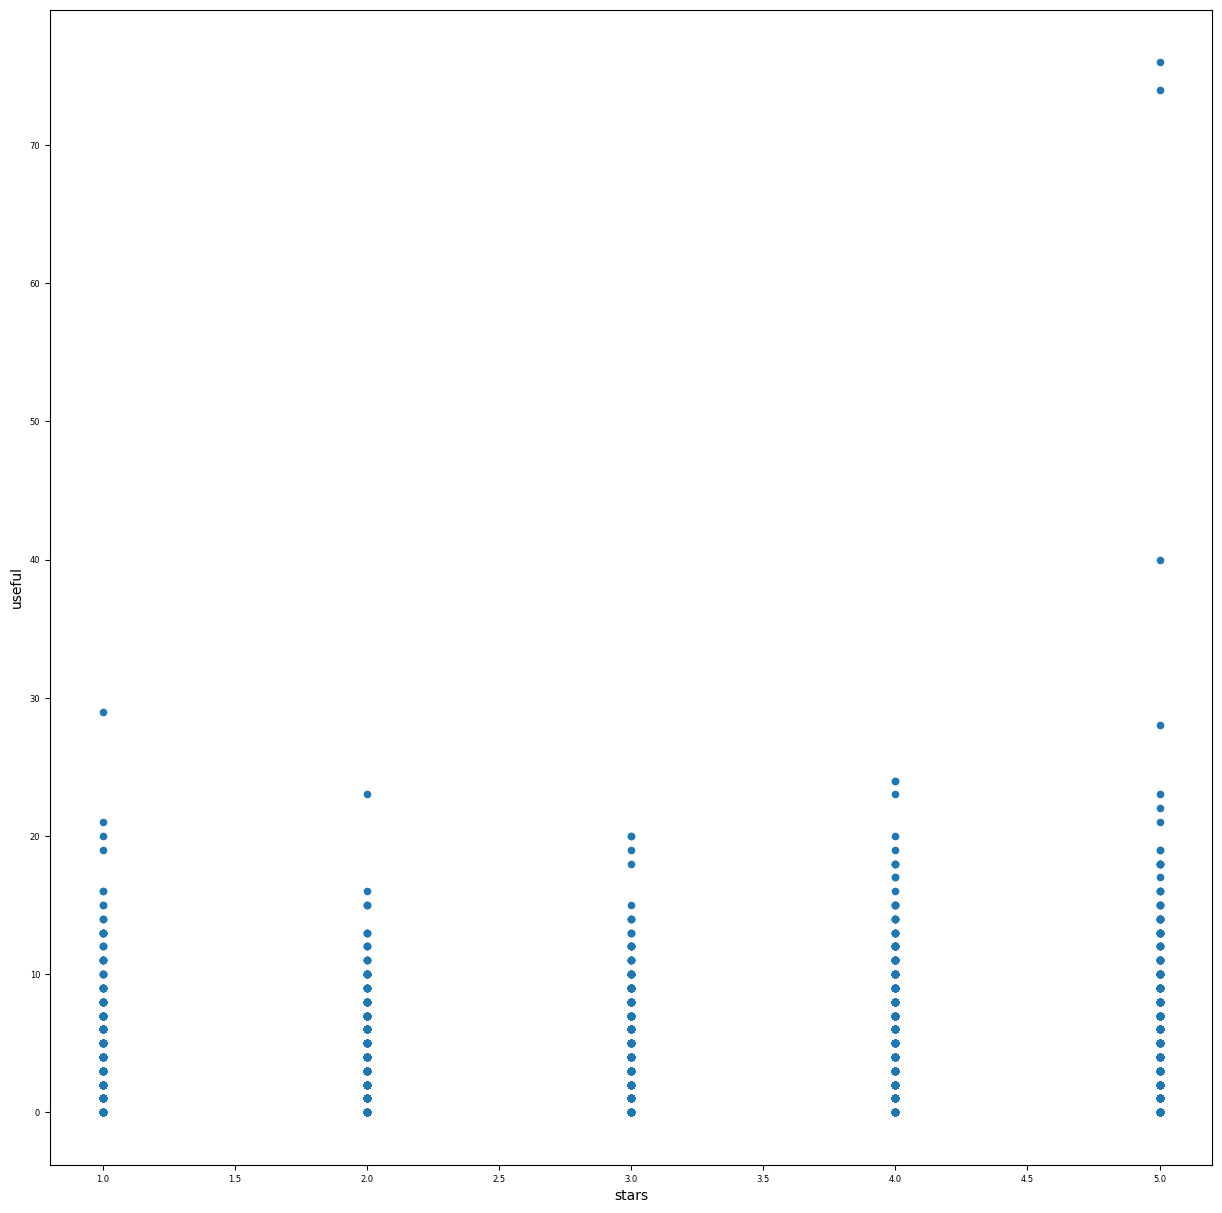

In [24]:
sampleData.plot(kind = 'scatter',y = 'useful',x='stars',fontsize=6,figsize=(15,15))
print("this figure can be demonstrating that there is no correlation between useful and the stars")

for the useful label and column it can be said that the reviews has been voted as useful evenly and the plots are showing some nicely distributed usefulness of reviews between all the stars from 1 to 5, although few outliers with high useful votes in the 5 stars reviews can be seen but because they are few, we can just ignore them, overall the relation between useful and stars there is not really meaningful and it can't be said that people vote a review useful based on the stars, However there is a correlation shown between them in the pairplot which in this case i feel like can't be reliable.

in this figure we can find meaningful relation between stars and the business categories


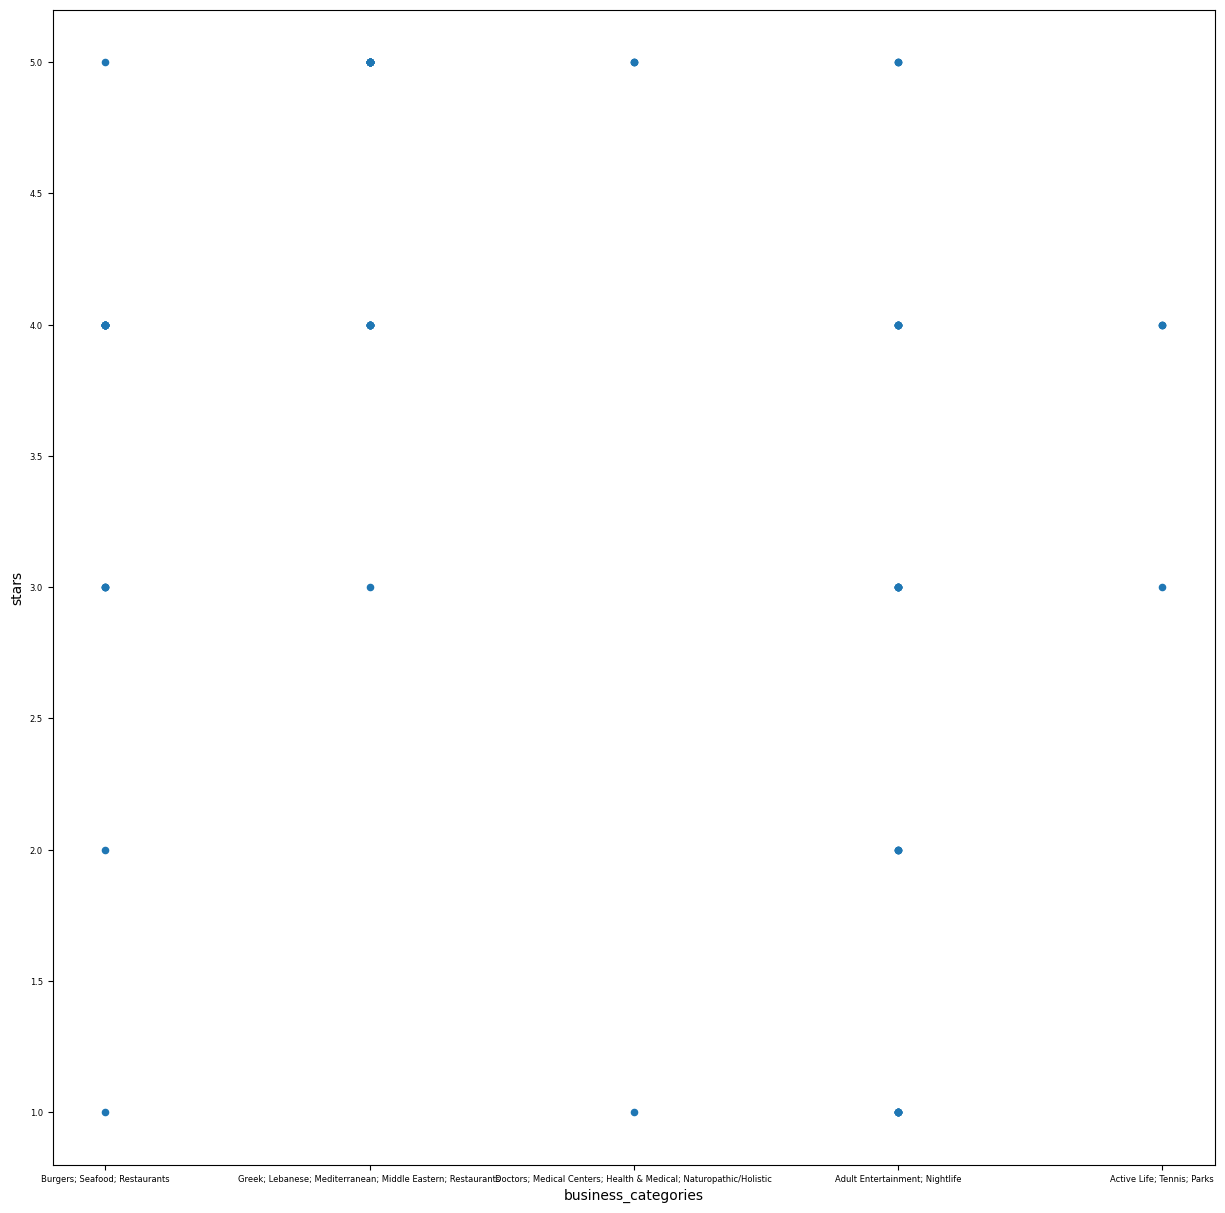

In [25]:
filteredCategories.plot(kind = 'scatter',x = 'business_categories',y='stars',fontsize=6,figsize=(15,15))
print("in this figure we can find meaningful relation between stars and the business categories")

In [26]:
starBusinesses = cleanData.groupby('business_city')['stars'].nunique().reset_index()
starBusinesses

,business_city,stars
0,Ahwatukee,5
1,Anthem,5
2,Apache Junction,5
3,Avondale,5
4,Buckeye,5
...,...,...
56,Waddell,3
57,Wickenburg,5
58,Wittmann,2
59,Youngtown,5


as shown in this data frame the number of stars given to each city is almost the same and evenly distributed

# summary
to conclude and analyse the given dataset using visualtion and plots i could get an idea of how different factors can affect people rating the business (stars) and leaving a review, since the dataset is quite large and it will be almost impossible to analyse the whole data so i took a smaller part of it (sample data) as you asked in Q2 and analysed the plots and figures generated based on the sample data i also used the cleaned data set to creat some plots and figures but for both of them it was still required to micro segment the data in order to have a clean and readable visualisation of the data. in the segmented parts of data there are different labels and column names that can be visualised and in my analyses from those graphs, not many of them are actually being related to the fluctuation in stars given to businesses. In conclusion it should be mentioned that it is true that many factors can affect the stars and reviews but there is no significant cause and effect relation between these labels and can be totally random just based on the people taste or opinion.